In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


1. df = Train data
- the test data and samplesubmissions are used to at the end apply our model

2. data exploration
- target column is not defined yet, but it is the PM2.5 definition of air pollution we are trying to predict
- We need to focus on time (day before and after), to see how this affects the pollution of the current day, important for the split and also later for the test set
- its all the same datatype int, but some columns with a lot of missing values / 0 (can we add it from online sources or do we drop it?)
- transform date format
- how to we feed date format in the regression? 

In [2]:
df = pd.read_csv("data/Train.csv")

In [3]:
df.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


In [4]:
df["target"].describe()

count    30557.000000
mean        61.148045
std         46.861309
min          1.000000
25%         25.000000
50%         50.000000
75%         80.000000
max        815.000000
Name: target, dtype: float64

In [5]:
df.nunique()

Place_ID X Date                                        30557
Date                                                      94
Place_ID                                                 340
target                                                   375
target_min                                               269
target_max                                               721
target_variance                                        29621
target_count                                             863
precipitable_water_entire_atmosphere                   12633
relative_humidity_2m_above_ground                      11284
specific_humidity_2m_above_ground                      21396
temperature_2m_above_ground                            29462
u_component_of_wind_10m_above_ground                   28240
v_component_of_wind_10m_above_ground                   28274
L3_NO2_NO2_column_number_density                       25758
L3_NO2_NO2_slant_column_number_density                 25758
L3_NO2_absorbing_aerosol

In [6]:
df.shape

(30557, 82)

In [7]:
df.isnull().sum()

Place_ID X Date                                            0
Date                                                       0
Place_ID                                                   0
target                                                     0
target_min                                                 0
target_max                                                 0
target_variance                                            0
target_count                                               0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        2189
L3_NO2_NO2_slant_column_number_density                  2189
L3_NO2_absorbing_aerosol

In [8]:
df["target"].describe()

count    30557.000000
mean        61.148045
std         46.861309
min          1.000000
25%         25.000000
50%         50.000000
75%         80.000000
max        815.000000
Name: target, dtype: float64

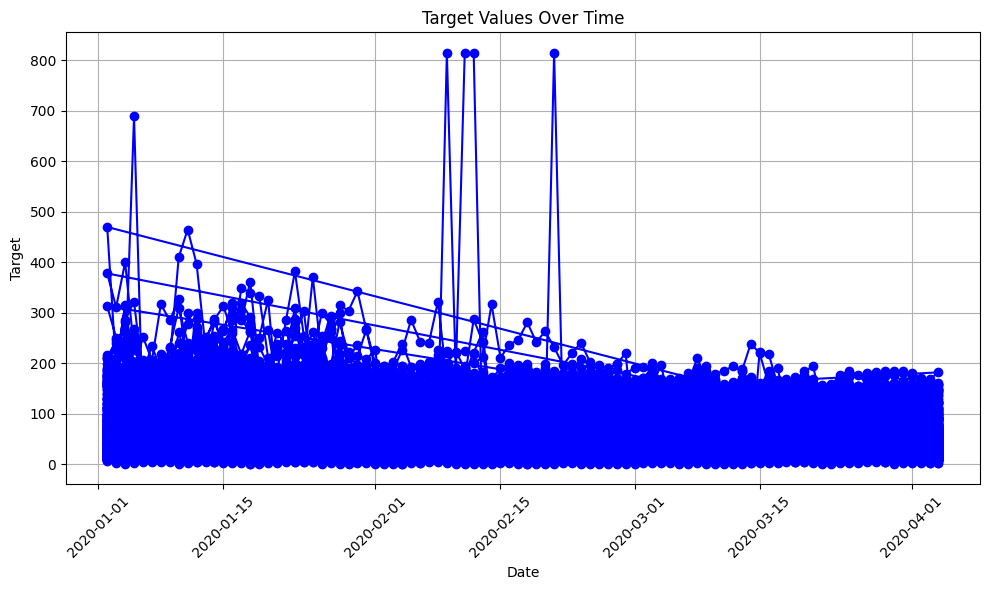

In [13]:
# Convert the 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Plot the target variable over time (Time Series)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['target'], marker='o', linestyle='-', color='b')
plt.title('Target Values Over Time')
plt.xlabel('Date')
plt.ylabel('Target')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


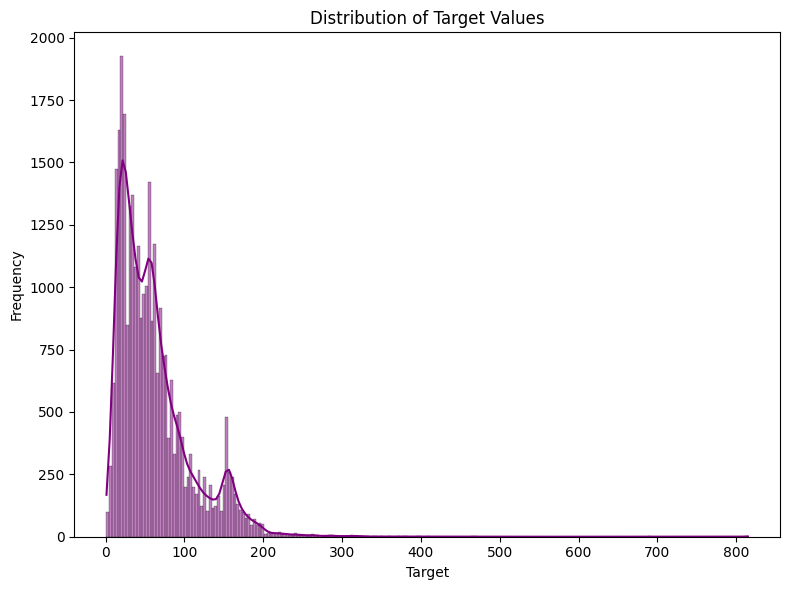

In [16]:
# Distribution plot for the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True, color='purple')
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


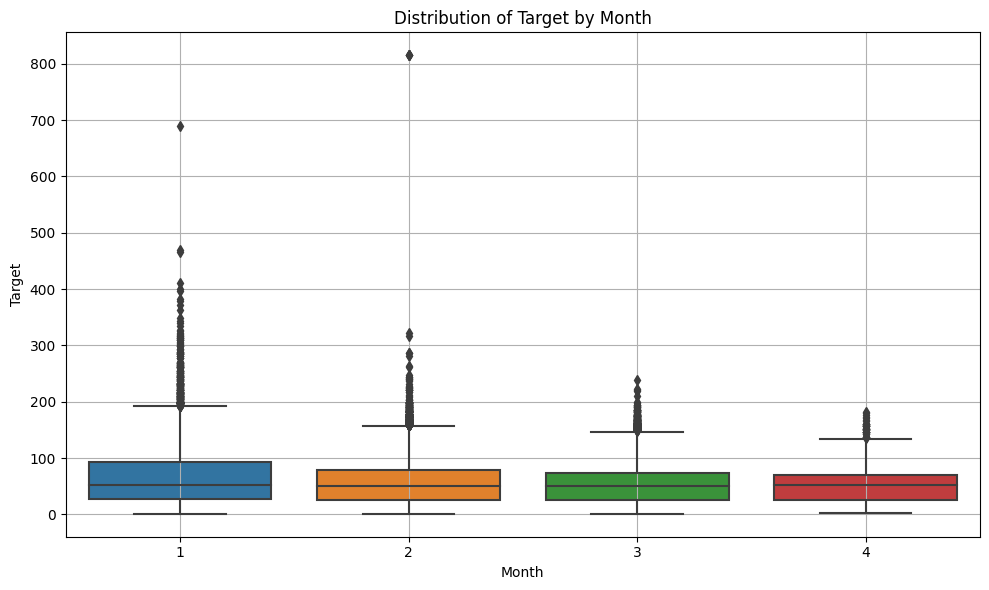

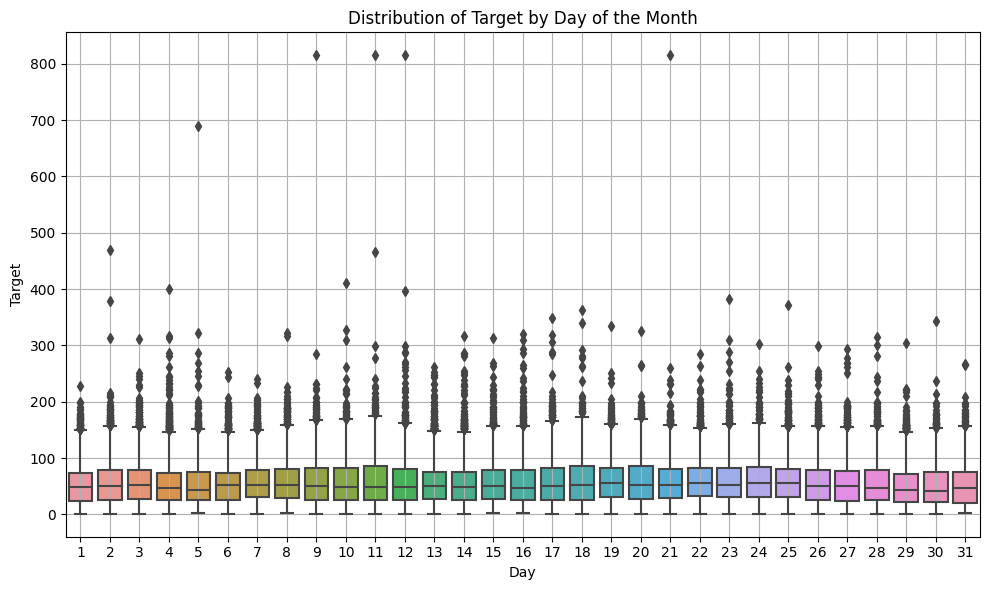

In [17]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create separate columns for month and day
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Plot the distribution of 'target' by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='target', data=df)
plt.title('Distribution of Target by Month')
plt.xlabel('Month')
plt.ylabel('Target')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the distribution of 'target' by Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day', y='target', data=df)
plt.title('Distribution of Target by Day of the Month')
plt.xlabel('Day')
plt.ylabel('Target')
plt.grid(True)
plt.tight_layout()
plt.show()

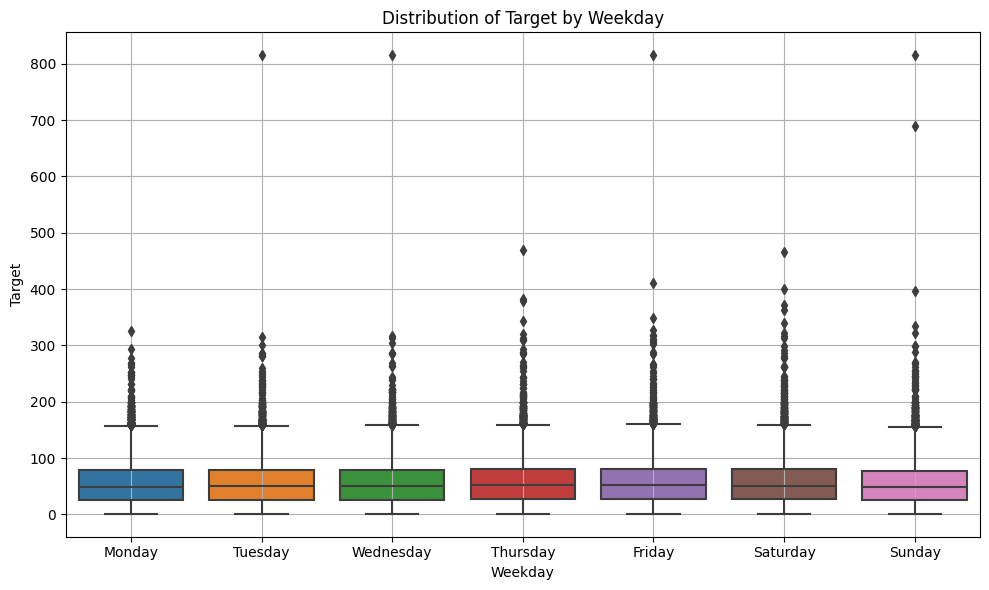

In [18]:
# Create a column for weekdays (0=Monday, 6=Sunday)
df['Weekday'] = df['Date'].dt.weekday

# Optional: Map weekday numbers to names for better readability
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Weekday_name'] = df['Weekday'].map(weekday_map)

# Plot the distribution of 'target' by Weekday
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekday_name', y='target', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Target by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Target')
plt.grid(True)
plt.tight_layout()
plt.show()

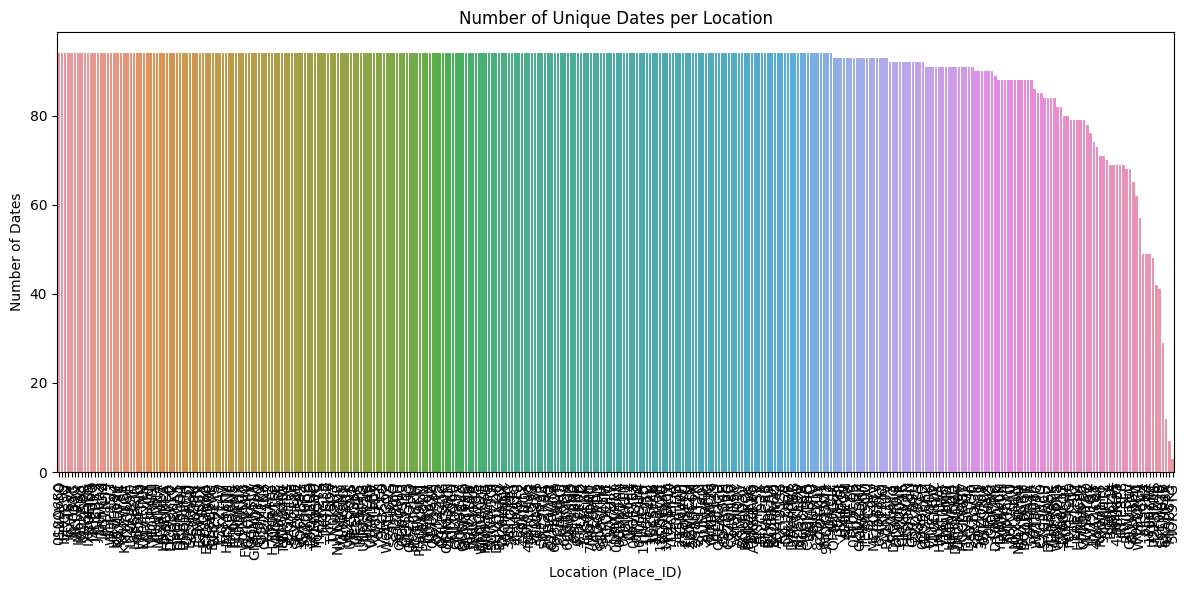

    Place_ID  Date_Count
0    010Q650          94
208  JSXAVKO          94
190  I5RGE5G          94
191  I6718VY          94
192  I6VIR8R          94
193  IJKTQ0G          94
195  IM6VR3X          94
196  IOLPRPO          94
197  IST2SPS          94
198  IXVOHYQ          94
199  J39EIKN          94
201  J3HFUPO          94
202  J4UZBX3          94
203  J8IR9R2          94
204  JABMGKI          94
205  JID7N54          94
322  WQP8SI3          94
188  HRUE894          94
210  KB7LD9K          94
212  KXX7F64          94
213  KYNZWCA          94
214  KZJQU9F          94
215  L17O89H          94
216  L686B2W          94
218  LF5EAJD          94
321  WP7PTYQ          94
222  LXRFONN          94
223  M17FYGT          94
224  M53IXJM          94
320  WOIRN9J          94
227  MUJVVNA          94
228  N5RI4GT          94
189  HSXRMLA          94
187  HR0OKCA          94
135  DCBEVTO          94
159  F9780KK          94
142  DPQKOA5          94
143  DRFD4D1          94
144  DSG5LHH          94


In [19]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by 'Place_ID' and count the number of unique dates per location
date_counts_per_location = df.groupby('Place_ID')['Date'].nunique().reset_index()

# Rename columns for clarity
date_counts_per_location.columns = ['Place_ID', 'Date_Count']

# Sort the data by 'Date_Count' to see the order of how many dates are present per location
date_counts_per_location = date_counts_per_location.sort_values(by='Date_Count', ascending=False)

# Plot the number of dates per location
plt.figure(figsize=(12, 6))
sns.barplot(x='Place_ID', y='Date_Count', data=date_counts_per_location)
plt.xticks(rotation=90)
plt.title('Number of Unique Dates per Location')
plt.xlabel('Location (Place_ID)')
plt.ylabel('Number of Dates')
plt.tight_layout()
plt.show()

# Display the result as a table
print(date_counts_per_location)

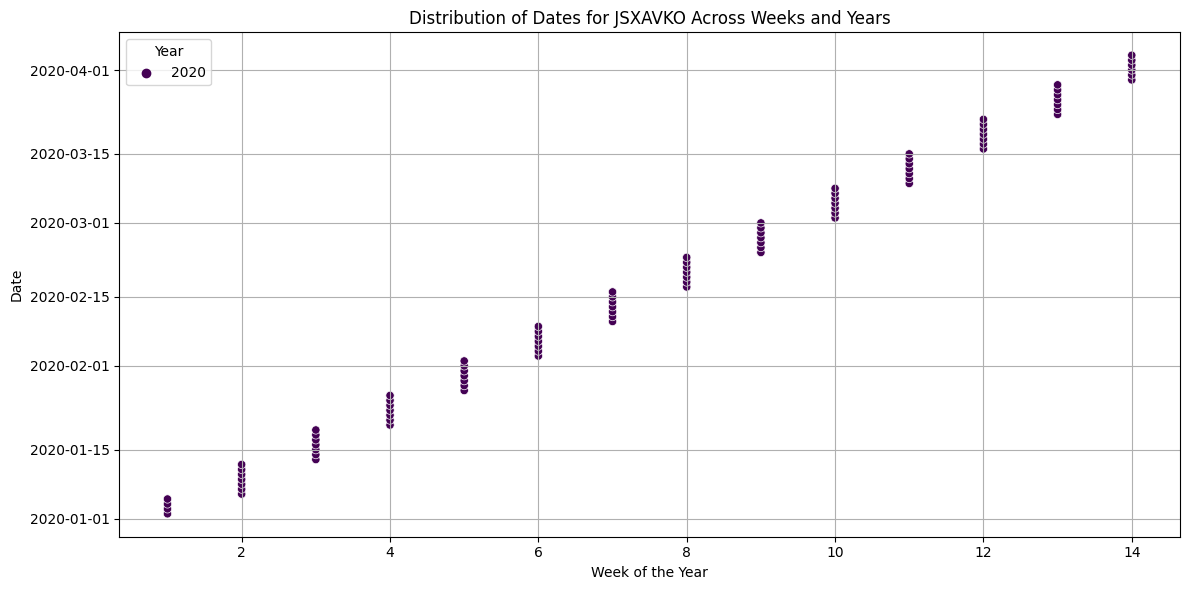

            Place_ID X Date       Date Place_ID  target  target_min   
18798  JSXAVKO X 2020-01-02 2020-01-02  JSXAVKO    63.0        13.0  \
18799  JSXAVKO X 2020-01-03 2020-01-03  JSXAVKO    80.0        46.0   
18800  JSXAVKO X 2020-01-04 2020-01-04  JSXAVKO   114.0        87.0   
18801  JSXAVKO X 2020-01-05 2020-01-05  JSXAVKO   147.0        87.0   
18802  JSXAVKO X 2020-01-06 2020-01-06  JSXAVKO   154.0       104.0   
18803  JSXAVKO X 2020-01-07 2020-01-07  JSXAVKO   157.0        93.0   
18804  JSXAVKO X 2020-01-08 2020-01-08  JSXAVKO   157.0       114.0   
18805  JSXAVKO X 2020-01-09 2020-01-09  JSXAVKO   155.0       122.0   
18806  JSXAVKO X 2020-01-10 2020-01-10  JSXAVKO   157.0        30.0   
18807  JSXAVKO X 2020-01-11 2020-01-11  JSXAVKO   154.0        70.0   
18808  JSXAVKO X 2020-01-12 2020-01-12  JSXAVKO   168.0       144.0   
18809  JSXAVKO X 2020-01-13 2020-01-13  JSXAVKO   181.0       127.0   
18810  JSXAVKO X 2020-01-14 2020-01-14  JSXAVKO   160.0       119.0   
18811 

In [20]:
# Specify the Place_ID you want to check
place_id = 'JSXAVKO'

# Filter the DataFrame for the specific Place_ID
df_place_id = df[df['Place_ID'] == place_id]

# Check if there are any rows for this Place_ID
if df_place_id.empty:
    print(f"No data found for Place_ID: {place_id}")
else:
    # Extract additional time-related features: Year, Week, Day of the Week
    df_place_id['Year'] = df_place_id['Date'].dt.year
    df_place_id['Week'] = df_place_id['Date'].dt.isocalendar().week
    df_place_id['Weekday'] = df_place_id['Date'].dt.weekday

    # Sort the DataFrame by Date to see if there's an order
    df_place_id_sorted = df_place_id.sort_values(by='Date')

    # Plot the distribution of dates across weeks and years
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Week', y='Date', hue='Year', data=df_place_id_sorted, palette='viridis', marker='o')
    plt.title(f'Distribution of Dates for {place_id} Across Weeks and Years')
    plt.xlabel('Week of the Year')
    plt.ylabel('Date')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display the sorted DataFrame for further analysis
    print(df_place_id_sorted)

In [22]:
df["Date"].max()

Timestamp('2020-04-04 00:00:00')

In [23]:
df_test = pd.read_csv("Data/Test.csv")

In [27]:
df_test["Date"].max()

'2020-04-04'

In [28]:
df_test["Date"].min()

'2020-01-02'

In [31]:
df["Date"].min()

Timestamp('2020-01-02 00:00:00')

In [33]:
df["Date"].mean()

Timestamp('2020-02-17 11:32:35.807180032')

In [34]:
df_sample = pd.read_csv("data/SampleSubmission.csv")

In [35]:
df_sample.head(1)

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,0


In [36]:
# Split the 'Place_ID X Date' column into two new columns: 'Place_ID' and 'Date'
df_sample[['Place_ID', 'Date']] = df_sample['Place_ID X Date'].str.split(' X ', expand=True)

# Convert the 'Date' column to a datetime format
df_sample['Date'] = pd.to_datetime(df_sample['Date'])

# Drop the original 'Place_ID X Date' column if you no longer need it
df_sample = df_sample.drop(columns=['Place_ID X Date'])

# Display the updated DataFrame
print(df_sample)

       target Place_ID       Date
0           0  0OS9LVX 2020-01-02
1           0  0OS9LVX 2020-01-03
2           0  0OS9LVX 2020-01-04
3           0  0OS9LVX 2020-01-05
4           0  0OS9LVX 2020-01-06
5           0  0OS9LVX 2020-01-07
6           0  0OS9LVX 2020-01-08
7           0  0OS9LVX 2020-01-09
8           0  0OS9LVX 2020-01-10
9           0  0OS9LVX 2020-01-11
10          0  0OS9LVX 2020-01-12
11          0  0OS9LVX 2020-01-13
12          0  0OS9LVX 2020-01-14
13          0  0OS9LVX 2020-01-15
14          0  0OS9LVX 2020-01-16
15          0  0OS9LVX 2020-01-17
16          0  0OS9LVX 2020-01-18
17          0  0OS9LVX 2020-01-19
18          0  0OS9LVX 2020-01-20
19          0  0OS9LVX 2020-01-21
20          0  0OS9LVX 2020-01-22
21          0  0OS9LVX 2020-01-23
22          0  0OS9LVX 2020-01-24
23          0  0OS9LVX 2020-01-25
24          0  0OS9LVX 2020-01-26
25          0  0OS9LVX 2020-01-27
26          0  0OS9LVX 2020-01-28
27          0  0OS9LVX 2020-01-29
28          0 

In [37]:
df_sample["Date"].max()

Timestamp('2020-04-04 00:00:00')

In [38]:
df_sample["Date"].min()

Timestamp('2020-01-02 00:00:00')

In [40]:
# Group the DataFrame by 'Place_ID' and calculate the maximum 'Date' for each location
grouped_df = df.groupby('Place_ID')['Date'].max().reset_index()

# Sort the grouped DataFrame by 'Date' in descending order
grouped_df = grouped_df.sort_values(by='Date', ascending=False)

# Display the sorted DataFrame
print(grouped_df)

    Place_ID       Date
0    010Q650 2020-04-04
229  NCIFTFE 2020-04-04
227  MUJVVNA 2020-04-04
226  MJSB8K5 2020-04-04
225  ME8O4BV 2020-04-04
224  M53IXJM 2020-04-04
223  M17FYGT 2020-04-04
222  LXRFONN 2020-04-04
220  LSK9OJP 2020-04-04
218  LF5EAJD 2020-04-04
217  LBFYBY5 2020-04-04
216  L686B2W 2020-04-04
215  L17O89H 2020-04-04
214  KZJQU9F 2020-04-04
213  KYNZWCA 2020-04-04
212  KXX7F64 2020-04-04
211  KRT9EQD 2020-04-04
210  KB7LD9K 2020-04-04
209  JY4I65T 2020-04-04
228  N5RI4GT 2020-04-04
230  NHB348L 2020-04-04
250  Q9LESDG 2020-04-04
231  NJ1G8AW 2020-04-04
248  Q2F2SPS 2020-04-04
247  Q17XPXH 2020-04-04
246  Q0IXA5X 2020-04-04
245  PWER8U4 2020-04-04
244  PJ8AOXN 2020-04-04
243  PHOW9EM 2020-04-04
242  PCGUGKH 2020-04-04
241  PCEC7FM 2020-04-04
240  PA1M3UV 2020-04-04
239  P0TB067 2020-04-04
238  OU23QHQ 2020-04-04
237  OEN2305 2020-04-04
236  OE6VS93 2020-04-04
235  OCJ6GWU 2020-04-04
234  NW6MZ2E 2020-04-04
233  NMX4N9O 2020-04-04
232  NKXVNIW 2020-04-04
208  JSXAVKO 202

In [41]:
# Group the DataFrame by 'Place_ID' and calculate the maximum 'Date' for each location
grouped_df = df_sample.groupby('Place_ID')['Date'].max().reset_index()

# Sort the grouped DataFrame by 'Date' in descending order
grouped_df = grouped_df.sort_values(by='Date', ascending=False)

# Display the sorted DataFrame
print(grouped_df)

    Place_ID       Date
0    0OS9LVX 2020-04-04
120  NXR8UIK 2020-04-04
112  N13GNKZ 2020-04-04
113  N3VJDCH 2020-04-04
114  NIPJPJE 2020-04-04
115  NJFSSS1 2020-04-04
116  NJNT1L4 2020-04-04
117  NPGYODP 2020-04-04
118  NT9A6FP 2020-04-04
119  NUEDVX3 2020-04-04
121  OC6BBFN 2020-04-04
110  N0O5ZLI 2020-04-04
122  PFYSWP3 2020-04-04
123  PHJ2AC1 2020-04-04
124  PP5RBWO 2020-04-04
125  QDLS75K 2020-04-04
126  QLO2NZF 2020-04-04
127  RG3VKJB 2020-04-04
128  RKAR1AR 2020-04-04
129  S7F67CE 2020-04-04
111  N0PF0ST 2020-04-04
109  N04QCJO 2020-04-04
87   IZUDLPW 2020-04-04
97   L09JD4W 2020-04-04
1    0Q2LTOG 2020-04-04
90   JQ83891 2020-04-04
91   JTT436U 2020-04-04
92   JV6BKL1 2020-04-04
93   JWR64XG 2020-04-04
94   K0QHLEW 2020-04-04
95   K39BZEQ 2020-04-04
96   K3G6YOA 2020-04-04
98   LCD7B05 2020-04-04
108  MNOX0WS 2020-04-04
99   LOSOTRL 2020-04-04
100  LQ6ITV0 2020-04-04
101  LUNFFBL 2020-04-04
103  M5C67OC 2020-04-04
104  M9Z8DED 2020-04-04
105  MDMU646 2020-04-04
106  MELPBP8 202

In [46]:

# Load the CSV files into DataFrames
sample_submission = pd.read_csv('data/SampleSubmission.csv')
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

sample_submission[['Place_ID', 'Date']] = sample_submission['Place_ID X Date'].str.split(' X ', expand=True)

# Extract unique Place_IDs from each DataFrame
sample_submission_ids = sample_submission['Place_ID'].unique()
train_ids = train['Place_ID'].unique()
test_ids = test['Place_ID'].unique()

# Check if Place_IDs are the same across all datasets
same_place_ids = (set(sample_submission_ids) == set(train_ids) == set(test_ids))

if same_place_ids:
    print("The Place_IDs are the same in all three files.")
else:
    print("The Place_IDs differ between the files.")

# Optionally, you can check which Place_IDs are missing in any set
missing_in_train = set(sample_submission_ids) - set(train_ids)
missing_in_test = set(sample_submission_ids) - set(test_ids)

print("Place_IDs in SampleSubmission but not in Train:", missing_in_train)
print("Place_IDs in SampleSubmission but not in Test:", missing_in_test)

The Place_IDs differ between the files.
Place_IDs in SampleSubmission but not in Train: {'BXOOYQQ', 'XU3X4HU', 'BHDVVZ1', '8F0DFNG', 'JQ83891', 'NUEDVX3', 'T5IIAB1', 'WPWVL07', 'Y38MGCB', 'DRBCSEX', 'VV7SGFI', 'CUA4E5W', 'TJH3M9P', 'HR4CUK5', 'XHQS1Q9', 'D225A7N', '0OS9LVX', 'N0O5ZLI', 'Z2XYMS4', 'B0B69RZ', 'C178BOO', 'JWR64XG', 'NXR8UIK', '8V3GY99', 'NPGYODP', '6Q5AZWX', 'DK41FJZ', 'HWF7EZ3', 'JN2IEZN', 'CHCM3VT', 'SK52PK4', 'YJNLXFF', 'OC6BBFN', 'B61EFVW', 'WTO5E7Y', 'A5Q06QS', 'SGM8B5D', 'UCDO92A', 'WGVKA5G', 'CKQ783G', 'DF5ZLRW', 'LQ6ITV0', '6IHI634', '7SZW1UF', 'XJEXV7V', 'B6D31F4', '4DOKYIS', '8RC2FY4', 'HP8D6X8', 'CMTJVSQ', 'JV6BKL1', '19090SM', '6UUG3GR', 'MN4JVH4', '8196WE6', '5PXQINB', 'BFYKI97', '27N3G71', 'TWHT8RX', 'FZUZBZK', '9RXF2KR', '5RGROX5', 'ZIESWTR', 'N0PF0ST', 'K39BZEQ', 'VKB6NUF', '4B4QSFT', 'JPD1BBI', 'XAW49QB', 'H6QNYMX', '15WCXN1', 'UZ352TT', 'NJFSSS1', 'N13GNKZ', '68WXEMV', 'TYDTLKI', 'FIA6K0U', 'HJSDEVF', 'FU2OAAX', 'T0QPCP1', 'WRZ2ZFG', 'DES3SOP', 'SSNBQCB'

In [49]:
# Calculate the number of missing Place_IDs in train
missing_in_train_count = len(missing_in_train)

# Display the count of missing Place_IDs
print("Number of Place_IDs missing in Train:", missing_in_train_count)

Number of Place_IDs missing in Train: 179


In [51]:
sample_submission["Place_ID"].nunique()

179

In [54]:
location_groups = df.groupby("Place_ID")
type("location_groups")
for location_groups sub_df in location_groups_
    print (f"{location}:{sub_df}")

SyntaxError: invalid syntax (84450418.py, line 3)

group by different location and create differend panda frames for it, and for each of them we create a sub_df and target, and we do .shift(1) what it will do it will shift by one, it will give us yesterdays value if we shift by one

for that we can create new variable, sub df leg 1 

we create a new column, feature engineering, where for each place, what is the observation of the day before, but before this we need to do the train test split, it should also be in a forward looking fashion, take the last three days for each location as test set, in a forecasting problem we dont do long term prediction, its okay to take the alst 3 days as test set. Its gonna be location based. 

What are the two? create yesterday observation as a feature with groupby magic
generic thing create test set, forward looking test, last three days, it needs also group by manipulation


MAPE mean absolute error 


train set has 
day 1 - day 60

and test set

day 61, 62, 63

we need to add column which location, some are target Place_ID  - NEW column lag 1 --> day before (once created we do XGBOOST or linear regression on it - time aspect), first we create lage 1

sub df for each location as part of the est set

pearson correlation can be computed even with missing values, to see which features are not so powerful - for feature selection! 

measure performance, other complexity

how do we feed sub dfs in regression?

Baselinemodel is regression on Lag 1 column (target of the day before)